In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
import sklearn as skl
import seaborn
import seaborn as sns
from scipy.stats import zscore

#logistic Regression
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

#Deicison Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import graphviz
from sklearn.tree import export_graphviz

#Naive Bayes
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report

#### Load Data.

In [2]:
filename = 'C:/Users/Austie/OneDrive/Documents/AI/climber_df.csv'
pd.read_csv(filename).head()

user_id country  sex  height  weight   age  years_cl           date_first  \
0        1     SWE    0     177      73  41.0        21  1999-02-06 23:00:00   
1        3     SWE    0     180      78  44.0        22  1999-03-31 22:00:00   
2        4     SWE    1     165      58  33.0        16  2004-06-30 22:00:00   
3       10     SWE    0     167      63  52.0        25  2000-01-14 23:00:00   
4       16     NOR    0     177      68  44.0        21  1998-02-27 23:00:00   

             date_last  grades_count  grades_first  grades_last  grades_max  \
0  2001-07-31 22:00:00            84            36           55          62   
1  2000-07-19 22:00:00            12            53           51          59   
2  2009-05-26 22:00:00           119            53           49          64   
3  2017-06-01 22:00:00           298            53           49          63   
4  2010-05-13 22:00:00             5            53           49          53   

   grades_mean  year_first  year_last  
0    46.750000        1999       2001  
1    52.833333        1999       2000  
2    53.890756        2004       2009  
3    49.406040        2000       2017  
4    51.400000        1998       2010

#### Explore Data.

In [3]:
df = pd.read_csv(filename, index_col=0)
df.head()

country  sex  height  weight   age  years_cl           date_first  \
user_id                                                                     
1           SWE    0     177      73  41.0        21  1999-02-06 23:00:00   
3           SWE    0     180      78  44.0        22  1999-03-31 22:00:00   
4           SWE    1     165      58  33.0        16  2004-06-30 22:00:00   
10          SWE    0     167      63  52.0        25  2000-01-14 23:00:00   
16          NOR    0     177      68  44.0        21  1998-02-27 23:00:00   

                   date_last  grades_count  grades_first  grades_last  \
user_id                                                                 
1        2001-07-31 22:00:00            84            36           55   
3        2000-07-19 22:00:00            12            53           51   
4        2009-05-26 22:00:00           119            53           49   
10       2017-06-01 22:00:00           298            53           49   
16       2010-05-13 22:00:00             5            53           49   

         grades_max  grades_mean  year_first  year_last  
user_id                                                  
1                62    46.750000        1999       2001  
3                59    52.833333        1999       2000  
4                64    53.890756        2004       2009  
10               63    49.406040        2000       2017  
16               53    51.400000        1998       2010

In [4]:
df['country'].unique()

array(['SWE', 'NOR', 'BEL', 'CAN', 'other', 'GBR', 'NLD', 'USA', 'DEU',
       'ITA', 'FRA', 'POL', 'ZAF', 'PRT', 'AUS', 'CZE', 'AUT', 'ESP',
       'HRV', 'MEX', 'BRA', 'CHE', 'SVN', 'DNK', 'RUS', 'FIN'],
      dtype=object)

In [5]:
min_value = df['grades_max'].min()
max_value = df['grades_max'].max()
mean_value = df['grades_max'].mean()

print(f"grades_max: {min_value}, max: {max_value}, mean: {mean_value}")

grades_max: 29, max: 77, mean: 53.76443671639059


In [6]:
min_value = df['age'].min()
max_value = df['age'].max()
mean_value = df['age'].mean()

print(f"age: {min_value}, max: {max_value}, mean: {mean_value}")

age: 12.0, max: 69.0, mean: 33.33385192642079


In [7]:
df.dtypes

country          object
sex               int64
height            int64
weight            int64
age             float64
years_cl          int64
date_first       object
date_last        object
grades_count      int64
grades_first      int64
grades_last       int64
grades_max        int64
grades_mean     float64
year_first        int64
year_last         int64
dtype: object

In [8]:
#convert dates to Day-Month-Year
df['date_first'] = pd.to_datetime(df['date_first'])
df['date_last'] = pd.to_datetime(df['date_last'])

df['date_first'] = df['date_first'].dt.strftime('%d-%m-%Y')
df['date_last'] = df['date_last'].dt.strftime('%d-%m-%Y')

In [9]:
df['sex'] = df['sex'].map({0: 'Male', 1: 'Female'})
df.head()

country     sex  height  weight   age  years_cl  date_first  \
user_id                                                               
1           SWE    Male     177      73  41.0        21  06-02-1999   
3           SWE    Male     180      78  44.0        22  31-03-1999   
4           SWE  Female     165      58  33.0        16  30-06-2004   
10          SWE    Male     167      63  52.0        25  14-01-2000   
16          NOR    Male     177      68  44.0        21  27-02-1998   

          date_last  grades_count  grades_first  grades_last  grades_max  \
user_id                                                                    
1        31-07-2001            84            36           55          62   
3        19-07-2000            12            53           51          59   
4        26-05-2009           119            53           49          64   
10       01-06-2017           298            53           49          63   
16       13-05-2010             5            53           49          53   

         grades_mean  year_first  year_last  
user_id                                      
1          46.750000        1999       2001  
3          52.833333        1999       2000  
4          53.890756        2004       2009  
10         49.406040        2000       2017  
16         51.400000        1998       2010

In [10]:
missing_values_count = df.isnull().sum()

print(missing_values_count)

total_missing_values = missing_values_count.sum()
print(f'Total missing values in the dataset: {total_missing_values}')

num_dates = (df['date_first'] == '01-01-1999').sum()
print(f"Number of dates at 01-01-1999: {num_dates}")

country         0
sex             0
height          0
weight          0
age             0
years_cl        0
date_first      0
date_last       0
grades_count    0
grades_first    0
grades_last     0
grades_max      0
grades_mean     0
year_first      0
year_last       0
dtype: int64
Total missing values in the dataset: 0
Number of dates at 01-01-1999: 0


#### Visualisation of Data.

In [11]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='rainbow')
plt.title('Heatmap of Missing Values in DataFrame')
plt.show()

In [12]:
plt.figure(figsize=(15, 8))  
sns.scatterplot(x='age', y='grades_max', data=df, ec=None)
plt.xlabel('Age')
plt.ylabel('Max Grades')
plt.title('Scatterplot distribution of age against max grades')
plt.show()

In [13]:
plt.figure(figsize=(15, 8))  
sns.scatterplot(x='age', y='grades_last', data=df, ec=None)
plt.xlabel('Age')
plt.ylabel('Max Grades')
plt.title('Scatterplot distribution of age against last grades.')
plt.show()

In [14]:
plt.figure(figsize=(6,6))
sns.histplot(data=df, x='grades_max')
plt.title('Simple histogram of max grades.')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

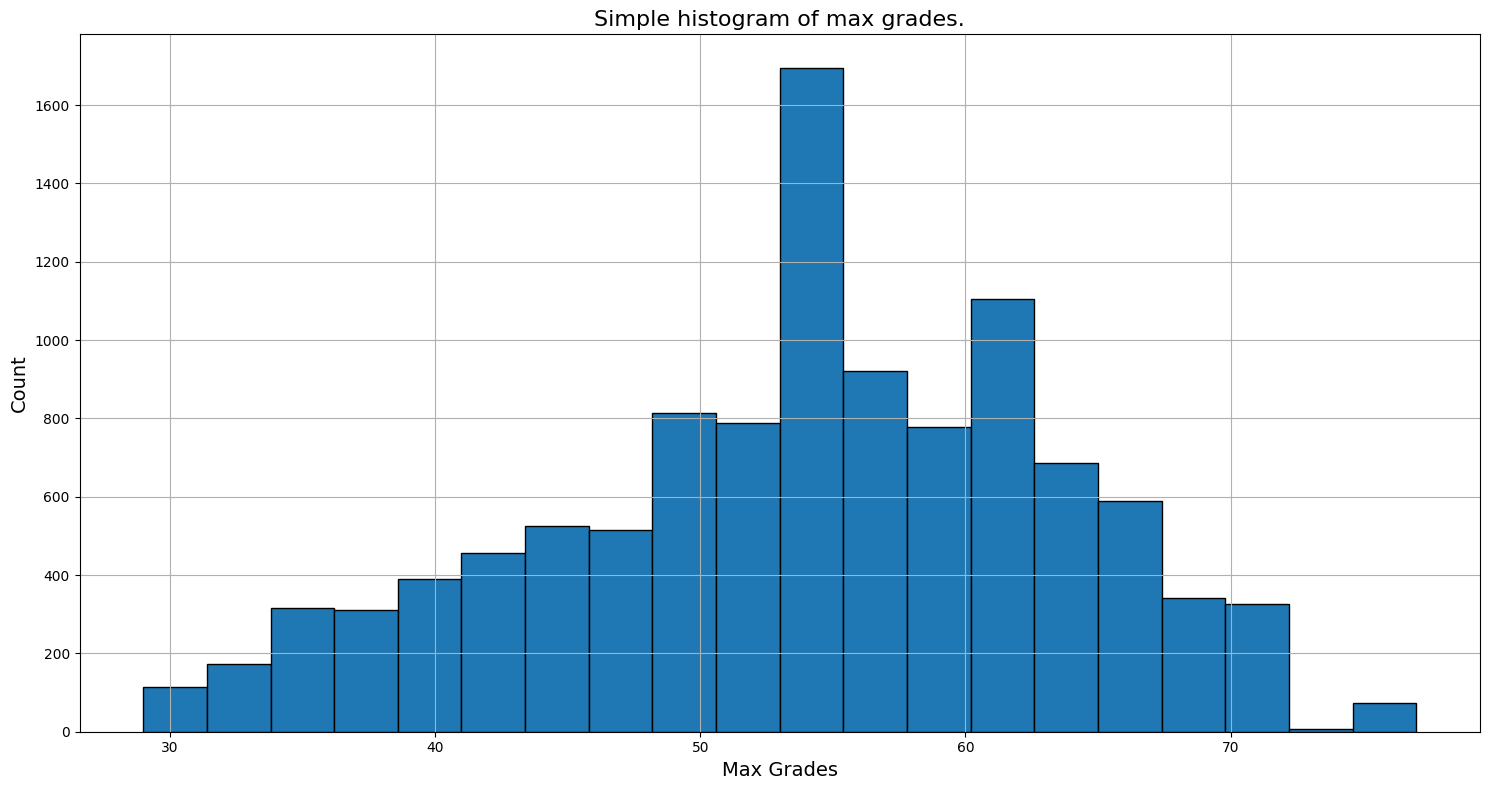

In [15]:
plt.figure(figsize=(15, 8))  
plt.hist(df['grades_max'], bins=20, edgecolor='black')  

plt.xlabel('Max Grades', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.title('Simple histogram of max grades.', fontsize=16)
plt.grid(True) 
plt.tight_layout()  
plt.show()

In [16]:
gender_counts = df.groupby(['country', 'sex']).size().unstack()
gender_percentage = gender_counts.div(gender_counts.sum(axis=1), axis=0) * 100

plt.figure(figsize=(15, 8))
ax = gender_percentage.plot(kind='bar', stacked=True, width=0.8)  

plt.xlabel('Country', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title('Percentage of Male and Female by Country', fontsize=14)
plt.xticks(rotation=90) 

plt.tick_params(axis='x', which='major', labelsize=10)

plt.tight_layout()
plt.show()

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

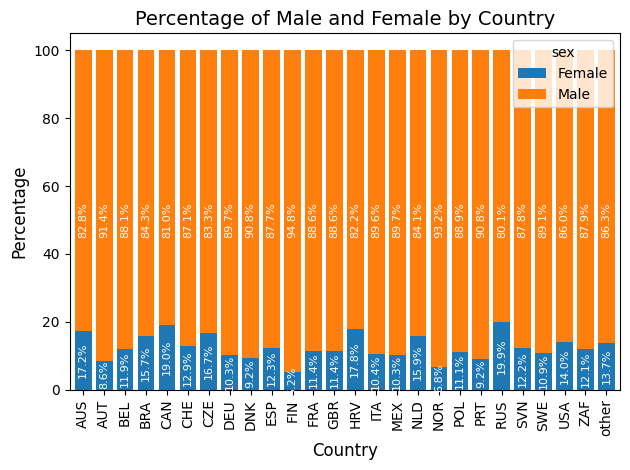

In [17]:
plt.figure(figsize=(15, 8))
ax = gender_percentage.plot(kind='bar', stacked=True, width=0.8)

plt.xlabel('Country', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title('Percentage of Male and Female by Country', fontsize=14)
plt.xticks(rotation=90) 
plt.tight_layout()  

previous_heights = {}

for bar in ax.patches:
    bar_height = bar.get_height()
    bar_width = bar.get_width()
    bar_x = bar.get_x()
    
    if bar_height > 0:
        if bar.get_y() == 0:
            center_y = bar_height / 2
            previous_heights[bar_x] = center_y  
        else:
            center_y = previous_heights[bar_x] + (bar_height / 2)
        
        ax.text(bar_x + bar_width/2, center_y, f'{bar_height:.1f}%', ha='center', va='center', fontsize=8, color='white', rotation=90)

plt.show()

In [18]:
gender_counts = df.groupby(['grades_max', 'sex']).size().unstack()


gender_percentage = gender_counts.div(gender_counts.sum(axis=1), axis=0) * 100

plt.figure(figsize=(15, 8))
ax = gender_percentage.plot(kind='bar', stacked=True, width=0.8)

plt.xlabel('Country', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title('Percentage of Male and Female by Country', fontsize=14)
plt.xticks(rotation=90)

plt.tick_params(axis='x', which='major', labelsize=10)

plt.tight_layout()
plt.show()

<Figure size 1500x800 with 0 Axes>

<Figure size 3000x1600 with 0 Axes>

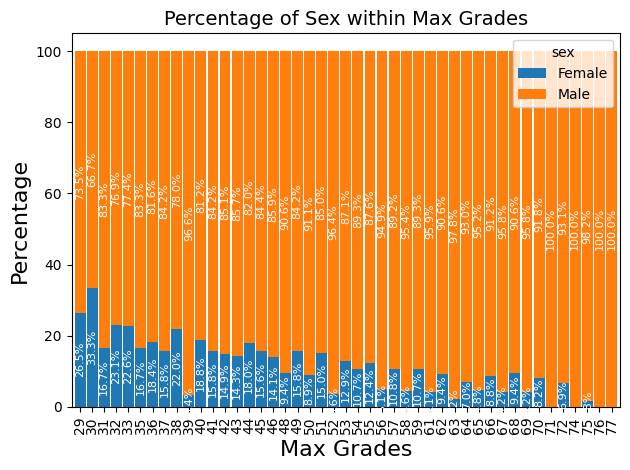

In [19]:
grades_sex_counts = df.groupby(['grades_max', 'sex']).size().unstack(fill_value=0)

grades_sex_percentage = grades_sex_counts.div(grades_sex_counts.sum(axis=1), axis=0) * 100

plt.figure(figsize=(30, 16))
ax = grades_sex_percentage.plot(kind='bar', stacked=True, width=0.9)

plt.xlabel('Max Grades', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.title('Percentage of Sex within Max Grades', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()

for bar in ax.patches:
    bar_height = bar.get_height()
    bar_width = bar.get_width()
    bar_x = bar.get_x()

    if bar_height > 1:
        center_y = bar.get_y() + bar_height / 2
        percentage_text = f'{bar_height:.1f}%'
        ax.text(bar_x + bar_width/2, center_y, percentage_text, ha='center', va='center', fontsize=8, color='white', rotation=90)

plt.show()

In [20]:
df['year_first'] = df['year_first'].apply(lambda x: 1999 if x < 1990 else x)
df['sex'] = df['sex'].map({'Male': 0, 'Female': 1})

indicators = [
    "height", "weight", "age", "years_cl", "grades_count", 
    "grades_first", "grades_last", "grades_max", "grades_mean", 
    "year_first", "year_last"
]

sns.pairplot(df[indicators])
plt.suptitle("Scatterplot Matrix of Features", y=1.02)
plt.show()

In [21]:
sns.scatterplot(data=df, x='year_first', y='height')
plt.title("Scatterplot of Year First vs. Height")
plt.xlabel("Year First")
plt.ylabel("Height")
plt.show()

# Modeling.

## Split train and test data.
Stratification to split the data into 2 frames, for training and testing.
It is important to use stratified split to ensure that no bias lies in the splitting of the data.

Parameters used:
- `random_state=20` to ensure consistency between runs
- `stratify=decision` to select the target variable as stratify parameter

## Feature types:
#### Descriptors:
- `country`: Country the climber is from.
- `sex`: Sex of the climber. (We want to predict this)
- `date_first`: Date they first climbed.
- `date_last`: date of last climb.

#### Indicators:
- `height`: Height of the person.
- `weight`: Weight of the person.
- `age`: Age of the person.
- `year_cl`: Number of years climbed.
- `grades_count`: Number of grades counted.
- `grades_first`: first grade score.
- `grades_last`: last grade score.
- `grades_max`: Highest grade score.
- `grades_mean`: Mean average grade score.
- `year_first`: Year first climb.
- `year_last`: Year last climb.


## Logistic Regression.

Finding best Features.

In [22]:
features = df.columns.drop('sex')
target = 'sex'

indicators = [
    "height", "weight", "age", "years_cl", "grades_count", 
    "grades_first", "grades_last", "grades_max", "grades_mean", 
    "year_first", "year_last"
]

combinations_list = []
for r in range(2, 5):
    combinations_list.extend(combinations(indicators, r))

auc_scores = {}

for idx, features_combination in enumerate(combinations_list, 1):
    print(f"Model {idx} features: {', '.join(features_combination)}")
    
    X_train, X_test, y_train, y_test = train_test_split(df[list(features_combination)], df[target], test_size=0.3, random_state=42)
    
    logreg = LogisticRegression(max_iter=5000)
    logreg.fit(X_train, y_train)
    
    auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])
    auc_scores[features_combination] = auc

sorted_auc_scores = sorted(auc_scores.items(), key=lambda x: x[1], reverse=True)

for idx, (features_combination, auc) in enumerate(sorted_auc_scores[:20], 1):
    print(f"Top {idx} Model features: {', '.join(features_combination)} - AUC: {auc:.2f}")


Model 1 features: height, weight
Model 2 features: height, age
Model 3 features: height, years_cl
Model 4 features: height, grades_count
Model 5 features: height, grades_first
Model 6 features: height, grades_last
Model 7 features: height, grades_max
Model 8 features: height, grades_mean
Model 9 features: height, year_first
Model 10 features: height, year_last
Model 11 features: weight, age
Model 12 features: weight, years_cl
Model 13 features: weight, grades_count
Model 14 features: weight, grades_first
Model 15 features: weight, grades_last
Model 16 features: weight, grades_max
Model 17 features: weight, grades_mean
Model 18 features: weight, year_first
Model 19 features: weight, year_last
Model 20 features: age, years_cl
Model 21 features: age, grades_count
Model 22 features: age, grades_first
Model 23 features: age, grades_last
Model 24 features: age, grades_max
Model 25 features: age, grades_mean
Model 26 features: age, year_first
Model 27 features: age, year_last
Model 28 feature

Model 178 features: years_cl, grades_last, year_first
Model 179 features: years_cl, grades_last, year_last
Model 180 features: years_cl, grades_max, grades_mean
Model 181 features: years_cl, grades_max, year_first
Model 182 features: years_cl, grades_max, year_last
Model 183 features: years_cl, grades_mean, year_first
Model 184 features: years_cl, grades_mean, year_last
Model 185 features: years_cl, year_first, year_last
Model 186 features: grades_count, grades_first, grades_last
Model 187 features: grades_count, grades_first, grades_max
Model 188 features: grades_count, grades_first, grades_mean
Model 189 features: grades_count, grades_first, year_first
Model 190 features: grades_count, grades_first, year_last
Model 191 features: grades_count, grades_last, grades_max
Model 192 features: grades_count, grades_last, grades_mean
Model 193 features: grades_count, grades_last, year_first
Model 194 features: grades_count, grades_last, year_last
Model 195 features: grades_count, grades_max, g

Model 322 features: height, grades_first, grades_last, grades_mean
Model 323 features: height, grades_first, grades_last, year_first
Model 324 features: height, grades_first, grades_last, year_last
Model 325 features: height, grades_first, grades_max, grades_mean
Model 326 features: height, grades_first, grades_max, year_first
Model 327 features: height, grades_first, grades_max, year_last
Model 328 features: height, grades_first, grades_mean, year_first
Model 329 features: height, grades_first, grades_mean, year_last
Model 330 features: height, grades_first, year_first, year_last
Model 331 features: height, grades_last, grades_max, grades_mean
Model 332 features: height, grades_last, grades_max, year_first
Model 333 features: height, grades_last, grades_max, year_last
Model 334 features: height, grades_last, grades_mean, year_first
Model 335 features: height, grades_last, grades_mean, year_last
Model 336 features: height, grades_last, year_first, year_last
Model 337 features: height, 

Model 457 features: age, grades_count, grades_max, year_last
Model 458 features: age, grades_count, grades_mean, year_first
Model 459 features: age, grades_count, grades_mean, year_last
Model 460 features: age, grades_count, year_first, year_last
Model 461 features: age, grades_first, grades_last, grades_max
Model 462 features: age, grades_first, grades_last, grades_mean
Model 463 features: age, grades_first, grades_last, year_first
Model 464 features: age, grades_first, grades_last, year_last
Model 465 features: age, grades_first, grades_max, grades_mean
Model 466 features: age, grades_first, grades_max, year_first
Model 467 features: age, grades_first, grades_max, year_last
Model 468 features: age, grades_first, grades_mean, year_first
Model 469 features: age, grades_first, grades_mean, year_last
Model 470 features: age, grades_first, year_first, year_last
Model 471 features: age, grades_last, grades_max, grades_mean
Model 472 features: age, grades_last, grades_max, year_first
Model 

In [23]:
for idx, (features_combination, auc) in enumerate(sorted_auc_scores[:114], 1):
    print(f"Top {idx} Model features: {', '.join(features_combination)} - AUC: {auc:.2f}")

Top 1 Model features: height, weight, age, grades_mean - AUC: 0.95
Top 2 Model features: height, weight, grades_max, grades_mean - AUC: 0.95
Top 3 Model features: height, weight, grades_last, grades_mean - AUC: 0.95
Top 4 Model features: height, weight, years_cl, grades_mean - AUC: 0.95
Top 5 Model features: height, weight, age, grades_max - AUC: 0.95
Top 6 Model features: height, weight, grades_mean - AUC: 0.95
Top 7 Model features: height, weight, grades_mean, year_last - AUC: 0.95
Top 8 Model features: height, weight, grades_count, grades_mean - AUC: 0.95
Top 9 Model features: height, weight, grades_mean, year_first - AUC: 0.95
Top 10 Model features: height, weight, grades_last, grades_max - AUC: 0.95
Top 11 Model features: height, weight, grades_max, year_last - AUC: 0.95
Top 12 Model features: height, weight, grades_count, grades_max - AUC: 0.95
Top 13 Model features: height, weight, grades_first, grades_mean - AUC: 0.95
Top 14 Model features: height, weight, years_cl, grades_max 

In [24]:
accuracy_scores = {}

for idx, features_combination in enumerate(combinations_list, 1):
    print(f"Model {idx} features: {', '.join(features_combination)}")
    
    X_train, X_test, y_train, y_test = train_test_split(df[list(features_combination)], df[target], test_size=0.3, random_state=42)
    logreg = LogisticRegression(max_iter=5000)
    logreg.fit(X_train, y_train)
    
    accuracy = accuracy_score(y_test, logreg.predict(X_test))
    accuracy_scores[features_combination] = accuracy

sorted_accuracy_scores = sorted(accuracy_scores.items(), key=lambda x: x[1], reverse=True)

Model 1 features: height, weight
Model 2 features: height, age
Model 3 features: height, years_cl
Model 4 features: height, grades_count
Model 5 features: height, grades_first
Model 6 features: height, grades_last
Model 7 features: height, grades_max
Model 8 features: height, grades_mean
Model 9 features: height, year_first
Model 10 features: height, year_last
Model 11 features: weight, age
Model 12 features: weight, years_cl
Model 13 features: weight, grades_count
Model 14 features: weight, grades_first
Model 15 features: weight, grades_last
Model 16 features: weight, grades_max
Model 17 features: weight, grades_mean
Model 18 features: weight, year_first
Model 19 features: weight, year_last
Model 20 features: age, years_cl
Model 21 features: age, grades_count
Model 22 features: age, grades_first
Model 23 features: age, grades_last
Model 24 features: age, grades_max
Model 25 features: age, grades_mean
Model 26 features: age, year_first
Model 27 features: age, year_last
Model 28 feature

Model 180 features: years_cl, grades_max, grades_mean
Model 181 features: years_cl, grades_max, year_first
Model 182 features: years_cl, grades_max, year_last
Model 183 features: years_cl, grades_mean, year_first
Model 184 features: years_cl, grades_mean, year_last
Model 185 features: years_cl, year_first, year_last
Model 186 features: grades_count, grades_first, grades_last
Model 187 features: grades_count, grades_first, grades_max
Model 188 features: grades_count, grades_first, grades_mean
Model 189 features: grades_count, grades_first, year_first
Model 190 features: grades_count, grades_first, year_last
Model 191 features: grades_count, grades_last, grades_max
Model 192 features: grades_count, grades_last, grades_mean
Model 193 features: grades_count, grades_last, year_first
Model 194 features: grades_count, grades_last, year_last
Model 195 features: grades_count, grades_max, grades_mean
Model 196 features: grades_count, grades_max, year_first
Model 197 features: grades_count, grade

Model 322 features: height, grades_first, grades_last, grades_mean
Model 323 features: height, grades_first, grades_last, year_first
Model 324 features: height, grades_first, grades_last, year_last
Model 325 features: height, grades_first, grades_max, grades_mean
Model 326 features: height, grades_first, grades_max, year_first
Model 327 features: height, grades_first, grades_max, year_last
Model 328 features: height, grades_first, grades_mean, year_first
Model 329 features: height, grades_first, grades_mean, year_last
Model 330 features: height, grades_first, year_first, year_last
Model 331 features: height, grades_last, grades_max, grades_mean
Model 332 features: height, grades_last, grades_max, year_first
Model 333 features: height, grades_last, grades_max, year_last
Model 334 features: height, grades_last, grades_mean, year_first
Model 335 features: height, grades_last, grades_mean, year_last
Model 336 features: height, grades_last, year_first, year_last
Model 337 features: height, 

Model 455 features: age, grades_count, grades_max, grades_mean
Model 456 features: age, grades_count, grades_max, year_first
Model 457 features: age, grades_count, grades_max, year_last
Model 458 features: age, grades_count, grades_mean, year_first
Model 459 features: age, grades_count, grades_mean, year_last
Model 460 features: age, grades_count, year_first, year_last
Model 461 features: age, grades_first, grades_last, grades_max
Model 462 features: age, grades_first, grades_last, grades_mean
Model 463 features: age, grades_first, grades_last, year_first
Model 464 features: age, grades_first, grades_last, year_last
Model 465 features: age, grades_first, grades_max, grades_mean
Model 466 features: age, grades_first, grades_max, year_first
Model 467 features: age, grades_first, grades_max, year_last
Model 468 features: age, grades_first, grades_mean, year_first
Model 469 features: age, grades_first, grades_mean, year_last
Model 470 features: age, grades_first, year_first, year_last
Mode

In [25]:
for idx, (features_combination, accuracy) in enumerate(sorted_accuracy_scores[:52], 1):
    print(f"Top {idx} Model features: {', '.join(features_combination)} - Accuracy: {accuracy:.2f}")

Top 1 Model features: height, weight, age, grades_first - Accuracy: 0.93
Top 2 Model features: height, weight, age, grades_mean - Accuracy: 0.93
Top 3 Model features: height, weight, grades_max, year_last - Accuracy: 0.93
Top 4 Model features: height, weight, age, grades_max - Accuracy: 0.93
Top 5 Model features: height, weight, age, years_cl - Accuracy: 0.93
Top 6 Model features: height, weight, grades_count, grades_max - Accuracy: 0.93
Top 7 Model features: height, weight, grades_max, grades_mean - Accuracy: 0.93
Top 8 Model features: height, weight, grades_max - Accuracy: 0.93
Top 9 Model features: height, weight, grades_last, grades_max - Accuracy: 0.93
Top 10 Model features: height, weight, grades_max, year_first - Accuracy: 0.93
Top 11 Model features: height, weight, age, grades_last - Accuracy: 0.93
Top 12 Model features: height, weight, years_cl, grades_mean - Accuracy: 0.93
Top 13 Model features: height, weight, grades_first, grades_max - Accuracy: 0.93
Top 14 Model features: 

In [26]:
precision_recall_scores = {}

for idx, features_combination in enumerate(combinations_list, 1):
    print(f"Model {idx} features: {', '.join(features_combination)}")
    
    X_train, X_test, y_train, y_test = train_test_split(df[list(features_combination)], df[target], test_size=0.3, random_state=42)
    logreg = LogisticRegression(max_iter=5000)
    logreg.fit(X_train, y_train)
    
    y_pred = logreg.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision_recall_scores[features_combination] = (precision, recall)

sorted_precision_recall_scores = sorted(precision_recall_scores.items(), key=lambda x: x[1][0], reverse=True)

Model 1 features: height, weight
Model 2 features: height, age
Model 3 features: height, years_cl
Model 4 features: height, grades_count
Model 5 features: height, grades_first
Model 6 features: height, grades_last
Model 7 features: height, grades_max
Model 8 features: height, grades_mean
Model 9 features: height, year_first
Model 10 features: height, year_last
Model 11 features: weight, age
Model 12 features: weight, years_cl
Model 13 features: weight, grades_count
Model 14 features: weight, grades_first
Model 15 features: weight, grades_last
Model 16 features: weight, grades_max
Model 17 features: weight, grades_mean
Model 18 features: weight, year_first
Model 19 features: weight, year_last
Model 20 features: age, years_cl


C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248

Model 21 features: age, grades_count
Model 22 features: age, grades_first
Model 23 features: age, grades_last
Model 24 features: age, grades_max
Model 25 features: age, grades_mean
Model 26 features: age, year_first
Model 27 features: age, year_last
Model 28 features: years_cl, grades_count


C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248

Model 29 features: years_cl, grades_first
Model 30 features: years_cl, grades_last
Model 31 features: years_cl, grades_max
Model 32 features: years_cl, grades_mean
Model 33 features: years_cl, year_first
Model 34 features: years_cl, year_last
Model 35 features: grades_count, grades_first
Model 36 features: grades_count, grades_last


C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248

Model 37 features: grades_count, grades_max
Model 38 features: grades_count, grades_mean
Model 39 features: grades_count, year_first
Model 40 features: grades_count, year_last
Model 41 features: grades_first, grades_last
Model 42 features: grades_first, grades_max
Model 43 features: grades_first, grades_mean
Model 44 features: grades_first, year_first
Model 45 features: grades_first, year_last


C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248

Model 46 features: grades_last, grades_max
Model 47 features: grades_last, grades_mean
Model 48 features: grades_last, year_first
Model 49 features: grades_last, year_last
Model 50 features: grades_max, grades_mean
Model 51 features: grades_max, year_first
Model 52 features: grades_max, year_last
Model 53 features: grades_mean, year_first
Model 54 features: grades_mean, year_last


C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model 55 features: year_first, year_last
Model 56 features: height, weight, age
Model 57 features: height, weight, years_cl
Model 58 features: height, weight, grades_count
Model 59 features: height, weight, grades_first
Model 60 features: height, weight, grades_last
Model 61 features: height, weight, grades_max
Model 62 features: height, weight, grades_mean
Model 63 features: height, weight, year_first
Model 64 features: height, weight, year_last
Model 65 features: height, age, years_cl
Model 66 features: height, age, grades_count
Model 67 features: height, age, grades_first
Model 68 features: height, age, grades_last
Model 69 features: height, age, grades_max
Model 70 features: height, age, grades_mean
Model 71 features: height, age, year_first
Model 72 features: height, age, year_last
Model 73 features: height, years_cl, grades_count
Model 74 features: height, years_cl, grades_first
Model 75 features: height, years_cl, grades_last
Model 76 features: height, years_cl, grades_max
Model

C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248

Model 138 features: age, years_cl, grades_first
Model 139 features: age, years_cl, grades_last
Model 140 features: age, years_cl, grades_max
Model 141 features: age, years_cl, grades_mean
Model 142 features: age, years_cl, year_first
Model 143 features: age, years_cl, year_last


C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248

Model 144 features: age, grades_count, grades_first
Model 145 features: age, grades_count, grades_last
Model 146 features: age, grades_count, grades_max
Model 147 features: age, grades_count, grades_mean
Model 148 features: age, grades_count, year_first
Model 149 features: age, grades_count, year_last
Model 150 features: age, grades_first, grades_last


C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248

Model 151 features: age, grades_first, grades_max
Model 152 features: age, grades_first, grades_mean
Model 153 features: age, grades_first, year_first
Model 154 features: age, grades_first, year_last
Model 155 features: age, grades_last, grades_max
Model 156 features: age, grades_last, grades_mean


C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248

Model 157 features: age, grades_last, year_first
Model 158 features: age, grades_last, year_last
Model 159 features: age, grades_max, grades_mean
Model 160 features: age, grades_max, year_first
Model 161 features: age, grades_max, year_last
Model 162 features: age, grades_mean, year_first


C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248

Model 163 features: age, grades_mean, year_last
Model 164 features: age, year_first, year_last
Model 165 features: years_cl, grades_count, grades_first
Model 166 features: years_cl, grades_count, grades_last
Model 167 features: years_cl, grades_count, grades_max
Model 168 features: years_cl, grades_count, grades_mean


C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248

Model 169 features: years_cl, grades_count, year_first
Model 170 features: years_cl, grades_count, year_last
Model 171 features: years_cl, grades_first, grades_last
Model 172 features: years_cl, grades_first, grades_max
Model 173 features: years_cl, grades_first, grades_mean
Model 174 features: years_cl, grades_first, year_first
Model 175 features: years_cl, grades_first, year_last


C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248

Model 176 features: years_cl, grades_last, grades_max
Model 177 features: years_cl, grades_last, grades_mean
Model 178 features: years_cl, grades_last, year_first
Model 179 features: years_cl, grades_last, year_last
Model 180 features: years_cl, grades_max, grades_mean
Model 181 features: years_cl, grades_max, year_first
Model 182 features: years_cl, grades_max, year_last


C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248

Model 183 features: years_cl, grades_mean, year_first
Model 184 features: years_cl, grades_mean, year_last
Model 185 features: years_cl, year_first, year_last
Model 186 features: grades_count, grades_first, grades_last
Model 187 features: grades_count, grades_first, grades_max
Model 188 features: grades_count, grades_first, grades_mean
Model 189 features: grades_count, grades_first, year_first


C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248

Model 190 features: grades_count, grades_first, year_last
Model 191 features: grades_count, grades_last, grades_max
Model 192 features: grades_count, grades_last, grades_mean
Model 193 features: grades_count, grades_last, year_first
Model 194 features: grades_count, grades_last, year_last
Model 195 features: grades_count, grades_max, grades_mean
Model 196 features: grades_count, grades_max, year_first


C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248

Model 197 features: grades_count, grades_max, year_last
Model 198 features: grades_count, grades_mean, year_first
Model 199 features: grades_count, grades_mean, year_last
Model 200 features: grades_count, year_first, year_last
Model 201 features: grades_first, grades_last, grades_max
Model 202 features: grades_first, grades_last, grades_mean
Model 203 features: grades_first, grades_last, year_first


C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248

Model 204 features: grades_first, grades_last, year_last
Model 205 features: grades_first, grades_max, grades_mean
Model 206 features: grades_first, grades_max, year_first
Model 207 features: grades_first, grades_max, year_last
Model 208 features: grades_first, grades_mean, year_first
Model 209 features: grades_first, grades_mean, year_last
Model 210 features: grades_first, year_first, year_last


C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248

Model 211 features: grades_last, grades_max, grades_mean
Model 212 features: grades_last, grades_max, year_first
Model 213 features: grades_last, grades_max, year_last
Model 214 features: grades_last, grades_mean, year_first
Model 215 features: grades_last, grades_mean, year_last
Model 216 features: grades_last, year_first, year_last
Model 217 features: grades_max, grades_mean, year_first


C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248

Model 218 features: grades_max, grades_mean, year_last
Model 219 features: grades_max, year_first, year_last
Model 220 features: grades_mean, year_first, year_last
Model 221 features: height, weight, age, years_cl
Model 222 features: height, weight, age, grades_count
Model 223 features: height, weight, age, grades_first
Model 224 features: height, weight, age, grades_last
Model 225 features: height, weight, age, grades_max
Model 226 features: height, weight, age, grades_mean
Model 227 features: height, weight, age, year_first
Model 228 features: height, weight, age, year_last
Model 229 features: height, weight, years_cl, grades_count
Model 230 features: height, weight, years_cl, grades_first
Model 231 features: height, weight, years_cl, grades_last
Model 232 features: height, weight, years_cl, grades_max
Model 233 features: height, weight, years_cl, grades_mean
Model 234 features: height, weight, years_cl, year_first
Model 235 features: height, weight, years_cl, year_last
Model 236 fea

Model 356 features: weight, age, grades_first, grades_mean
Model 357 features: weight, age, grades_first, year_first
Model 358 features: weight, age, grades_first, year_last
Model 359 features: weight, age, grades_last, grades_max
Model 360 features: weight, age, grades_last, grades_mean
Model 361 features: weight, age, grades_last, year_first
Model 362 features: weight, age, grades_last, year_last
Model 363 features: weight, age, grades_max, grades_mean
Model 364 features: weight, age, grades_max, year_first
Model 365 features: weight, age, grades_max, year_last
Model 366 features: weight, age, grades_mean, year_first
Model 367 features: weight, age, grades_mean, year_last
Model 368 features: weight, age, year_first, year_last
Model 369 features: weight, years_cl, grades_count, grades_first
Model 370 features: weight, years_cl, grades_count, grades_last
Model 371 features: weight, years_cl, grades_count, grades_max
Model 372 features: weight, years_cl, grades_count, grades_mean
Model 

C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248

Model 426 features: age, years_cl, grades_count, grades_last
Model 427 features: age, years_cl, grades_count, grades_max
Model 428 features: age, years_cl, grades_count, grades_mean
Model 429 features: age, years_cl, grades_count, year_first
Model 430 features: age, years_cl, grades_count, year_last


C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248

Model 431 features: age, years_cl, grades_first, grades_last
Model 432 features: age, years_cl, grades_first, grades_max
Model 433 features: age, years_cl, grades_first, grades_mean
Model 434 features: age, years_cl, grades_first, year_first
Model 435 features: age, years_cl, grades_first, year_last


C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248

Model 436 features: age, years_cl, grades_last, grades_max
Model 437 features: age, years_cl, grades_last, grades_mean
Model 438 features: age, years_cl, grades_last, year_first
Model 439 features: age, years_cl, grades_last, year_last
Model 440 features: age, years_cl, grades_max, grades_mean


C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model 441 features: age, years_cl, grades_max, year_first
Model 442 features: age, years_cl, grades_max, year_last


C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model 443 features: age, years_cl, grades_mean, year_first
Model 444 features: age, years_cl, grades_mean, year_last


C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model 445 features: age, years_cl, year_first, year_last
Model 446 features: age, grades_count, grades_first, grades_last
Model 447 features: age, grades_count, grades_first, grades_max


C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248

Model 448 features: age, grades_count, grades_first, grades_mean
Model 449 features: age, grades_count, grades_first, year_first
Model 450 features: age, grades_count, grades_first, year_last
Model 451 features: age, grades_count, grades_last, grades_max


C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248

Model 452 features: age, grades_count, grades_last, grades_mean
Model 453 features: age, grades_count, grades_last, year_first
Model 454 features: age, grades_count, grades_last, year_last
Model 455 features: age, grades_count, grades_max, grades_mean


C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248

Model 456 features: age, grades_count, grades_max, year_first
Model 457 features: age, grades_count, grades_max, year_last
Model 458 features: age, grades_count, grades_mean, year_first
Model 459 features: age, grades_count, grades_mean, year_last
Model 460 features: age, grades_count, year_first, year_last
Model 461 features: age, grades_first, grades_last, grades_max
Model 462 features: age, grades_first, grades_last, grades_mean
Model 463 features: age, grades_first, grades_last, year_first
Model 464 features: age, grades_first, grades_last, year_last


C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248

Model 465 features: age, grades_first, grades_max, grades_mean
Model 466 features: age, grades_first, grades_max, year_first
Model 467 features: age, grades_first, grades_max, year_last
Model 468 features: age, grades_first, grades_mean, year_first
Model 469 features: age, grades_first, grades_mean, year_last


C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248

Model 470 features: age, grades_first, year_first, year_last
Model 471 features: age, grades_last, grades_max, grades_mean
Model 472 features: age, grades_last, grades_max, year_first
Model 473 features: age, grades_last, grades_max, year_last
Model 474 features: age, grades_last, grades_mean, year_first


C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248

Model 475 features: age, grades_last, grades_mean, year_last
Model 476 features: age, grades_last, year_first, year_last
Model 477 features: age, grades_max, grades_mean, year_first
Model 478 features: age, grades_max, grades_mean, year_last
Model 479 features: age, grades_max, year_first, year_last
Model 480 features: age, grades_mean, year_first, year_last


C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248

Model 481 features: years_cl, grades_count, grades_first, grades_last
Model 482 features: years_cl, grades_count, grades_first, grades_max
Model 483 features: years_cl, grades_count, grades_first, grades_mean
Model 484 features: years_cl, grades_count, grades_first, year_first
Model 485 features: years_cl, grades_count, grades_first, year_last
Model 486 features: years_cl, grades_count, grades_last, grades_max


C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248

Model 487 features: years_cl, grades_count, grades_last, grades_mean
Model 488 features: years_cl, grades_count, grades_last, year_first
Model 489 features: years_cl, grades_count, grades_last, year_last
Model 490 features: years_cl, grades_count, grades_max, grades_mean
Model 491 features: years_cl, grades_count, grades_max, year_first
Model 492 features: years_cl, grades_count, grades_max, year_last


C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248

Model 493 features: years_cl, grades_count, grades_mean, year_first
Model 494 features: years_cl, grades_count, grades_mean, year_last
Model 495 features: years_cl, grades_count, year_first, year_last
Model 496 features: years_cl, grades_first, grades_last, grades_max
Model 497 features: years_cl, grades_first, grades_last, grades_mean
Model 498 features: years_cl, grades_first, grades_last, year_first
Model 499 features: years_cl, grades_first, grades_last, year_last


C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248

Model 500 features: years_cl, grades_first, grades_max, grades_mean
Model 501 features: years_cl, grades_first, grades_max, year_first
Model 502 features: years_cl, grades_first, grades_max, year_last
Model 503 features: years_cl, grades_first, grades_mean, year_first
Model 504 features: years_cl, grades_first, grades_mean, year_last
Model 505 features: years_cl, grades_first, year_first, year_last


C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248

Model 506 features: years_cl, grades_last, grades_max, grades_mean
Model 507 features: years_cl, grades_last, grades_max, year_first
Model 508 features: years_cl, grades_last, grades_max, year_last
Model 509 features: years_cl, grades_last, grades_mean, year_first
Model 510 features: years_cl, grades_last, grades_mean, year_last


C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248

Model 511 features: years_cl, grades_last, year_first, year_last
Model 512 features: years_cl, grades_max, grades_mean, year_first
Model 513 features: years_cl, grades_max, grades_mean, year_last
Model 514 features: years_cl, grades_max, year_first, year_last
Model 515 features: years_cl, grades_mean, year_first, year_last
Model 516 features: grades_count, grades_first, grades_last, grades_max


C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248

Model 517 features: grades_count, grades_first, grades_last, grades_mean
Model 518 features: grades_count, grades_first, grades_last, year_first
Model 519 features: grades_count, grades_first, grades_last, year_last
Model 520 features: grades_count, grades_first, grades_max, grades_mean
Model 521 features: grades_count, grades_first, grades_max, year_first
Model 522 features: grades_count, grades_first, grades_max, year_last


C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248

Model 523 features: grades_count, grades_first, grades_mean, year_first
Model 524 features: grades_count, grades_first, grades_mean, year_last
Model 525 features: grades_count, grades_first, year_first, year_last
Model 526 features: grades_count, grades_last, grades_max, grades_mean
Model 527 features: grades_count, grades_last, grades_max, year_first
Model 528 features: grades_count, grades_last, grades_max, year_last


C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248

Model 529 features: grades_count, grades_last, grades_mean, year_first
Model 530 features: grades_count, grades_last, grades_mean, year_last
Model 531 features: grades_count, grades_last, year_first, year_last
Model 532 features: grades_count, grades_max, grades_mean, year_first
Model 533 features: grades_count, grades_max, grades_mean, year_last


C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248

Model 534 features: grades_count, grades_max, year_first, year_last
Model 535 features: grades_count, grades_mean, year_first, year_last
Model 536 features: grades_first, grades_last, grades_max, grades_mean
Model 537 features: grades_first, grades_last, grades_max, year_first
Model 538 features: grades_first, grades_last, grades_max, year_last
Model 539 features: grades_first, grades_last, grades_mean, year_first


C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248

Model 540 features: grades_first, grades_last, grades_mean, year_last
Model 541 features: grades_first, grades_last, year_first, year_last
Model 542 features: grades_first, grades_max, grades_mean, year_first
Model 543 features: grades_first, grades_max, grades_mean, year_last
Model 544 features: grades_first, grades_max, year_first, year_last
Model 545 features: grades_first, grades_mean, year_first, year_last
Model 546 features: grades_last, grades_max, grades_mean, year_first
Model 547 features: grades_last, grades_max, grades_mean, year_last
Model 548 features: grades_last, grades_max, year_first, year_last
Model 549 features: grades_last, grades_mean, year_first, year_last
Model 550 features: grades_max, grades_mean, year_first, year_last


C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248

In [27]:
for idx, (features_combination, (precision, recall)) in enumerate(sorted_precision_recall_scores[:20], 1):
    print(f"Top {idx} Model features: {', '.join(features_combination)} - Precision: {precision:.2f}, Recall: {recall:.2f}")

Top 1 Model features: height, weight, age, grades_first - Precision: 0.80, Recall: 0.60
Top 2 Model features: height, weight, grades_max, year_last - Precision: 0.80, Recall: 0.58
Top 3 Model features: height, weight, grades_max, year_first - Precision: 0.79, Recall: 0.57
Top 4 Model features: height, weight, grades_max, grades_mean - Precision: 0.79, Recall: 0.57
Top 5 Model features: height, weight, grades_max - Precision: 0.79, Recall: 0.57
Top 6 Model features: height, weight, grades_count, grades_max - Precision: 0.79, Recall: 0.58
Top 7 Model features: height, weight, grades_last, grades_max - Precision: 0.79, Recall: 0.57
Top 8 Model features: height, weight, age, grades_mean - Precision: 0.79, Recall: 0.59
Top 9 Model features: height, weight, age, grades_count - Precision: 0.79, Recall: 0.55
Top 10 Model features: height, weight, grades_first, year_first - Precision: 0.79, Recall: 0.55
Top 11 Model features: height, weight, age, years_cl - Precision: 0.79, Recall: 0.58
Top 12 

In [28]:
f1_scores = {}

for idx, features_combination in enumerate(combinations_list, 1):
    print(f"Model {idx} features: {', '.join(features_combination)}")
    
    X_train, X_test, y_train, y_test = train_test_split(df[list(features_combination)], df[target], test_size=0.3, random_state=42)
    logreg = LogisticRegression(max_iter=5000)
    logreg.fit(X_train, y_train)
    
    y_pred = logreg.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    f1_scores[features_combination] = f1

sorted_f1_scores = sorted(f1_scores.items(), key=lambda x: x[1], reverse=True)

Model 1 features: height, weight
Model 2 features: height, age
Model 3 features: height, years_cl
Model 4 features: height, grades_count
Model 5 features: height, grades_first
Model 6 features: height, grades_last
Model 7 features: height, grades_max
Model 8 features: height, grades_mean
Model 9 features: height, year_first
Model 10 features: height, year_last
Model 11 features: weight, age
Model 12 features: weight, years_cl
Model 13 features: weight, grades_count
Model 14 features: weight, grades_first
Model 15 features: weight, grades_last
Model 16 features: weight, grades_max
Model 17 features: weight, grades_mean
Model 18 features: weight, year_first
Model 19 features: weight, year_last
Model 20 features: age, years_cl
Model 21 features: age, grades_count
Model 22 features: age, grades_first
Model 23 features: age, grades_last
Model 24 features: age, grades_max
Model 25 features: age, grades_mean
Model 26 features: age, year_first
Model 27 features: age, year_last
Model 28 feature

Model 180 features: years_cl, grades_max, grades_mean
Model 181 features: years_cl, grades_max, year_first
Model 182 features: years_cl, grades_max, year_last
Model 183 features: years_cl, grades_mean, year_first
Model 184 features: years_cl, grades_mean, year_last
Model 185 features: years_cl, year_first, year_last
Model 186 features: grades_count, grades_first, grades_last
Model 187 features: grades_count, grades_first, grades_max
Model 188 features: grades_count, grades_first, grades_mean
Model 189 features: grades_count, grades_first, year_first
Model 190 features: grades_count, grades_first, year_last
Model 191 features: grades_count, grades_last, grades_max
Model 192 features: grades_count, grades_last, grades_mean
Model 193 features: grades_count, grades_last, year_first
Model 194 features: grades_count, grades_last, year_last
Model 195 features: grades_count, grades_max, grades_mean
Model 196 features: grades_count, grades_max, year_first
Model 197 features: grades_count, grade

Model 322 features: height, grades_first, grades_last, grades_mean
Model 323 features: height, grades_first, grades_last, year_first
Model 324 features: height, grades_first, grades_last, year_last
Model 325 features: height, grades_first, grades_max, grades_mean
Model 326 features: height, grades_first, grades_max, year_first
Model 327 features: height, grades_first, grades_max, year_last
Model 328 features: height, grades_first, grades_mean, year_first
Model 329 features: height, grades_first, grades_mean, year_last
Model 330 features: height, grades_first, year_first, year_last
Model 331 features: height, grades_last, grades_max, grades_mean
Model 332 features: height, grades_last, grades_max, year_first
Model 333 features: height, grades_last, grades_max, year_last
Model 334 features: height, grades_last, grades_mean, year_first
Model 335 features: height, grades_last, grades_mean, year_last
Model 336 features: height, grades_last, year_first, year_last
Model 337 features: height, 

Model 455 features: age, grades_count, grades_max, grades_mean
Model 456 features: age, grades_count, grades_max, year_first
Model 457 features: age, grades_count, grades_max, year_last
Model 458 features: age, grades_count, grades_mean, year_first
Model 459 features: age, grades_count, grades_mean, year_last
Model 460 features: age, grades_count, year_first, year_last
Model 461 features: age, grades_first, grades_last, grades_max
Model 462 features: age, grades_first, grades_last, grades_mean
Model 463 features: age, grades_first, grades_last, year_first
Model 464 features: age, grades_first, grades_last, year_last
Model 465 features: age, grades_first, grades_max, grades_mean
Model 466 features: age, grades_first, grades_max, year_first
Model 467 features: age, grades_first, grades_max, year_last
Model 468 features: age, grades_first, grades_mean, year_first
Model 469 features: age, grades_first, grades_mean, year_last
Model 470 features: age, grades_first, year_first, year_last
Mode

In [29]:
for idx, (features_combination, f1) in enumerate(sorted_f1_scores[:20], 1):
    print(f"Top {idx} Model features: {', '.join(features_combination)} - F1-score: {f1:.2f}")

Top 1 Model features: height, weight, age, grades_first - F1-score: 0.68
Top 2 Model features: height, weight, age, grades_mean - F1-score: 0.68
Top 3 Model features: height, weight, age, grades_max - F1-score: 0.67
Top 4 Model features: height, weight, grades_max, year_last - F1-score: 0.67
Top 5 Model features: height, weight, age, years_cl - F1-score: 0.67
Top 6 Model features: height, weight, grades_count, grades_max - F1-score: 0.67
Top 7 Model features: height, weight, age, grades_last - F1-score: 0.66
Top 8 Model features: height, weight, grades_max, grades_mean - F1-score: 0.66
Top 9 Model features: height, weight, years_cl, grades_mean - F1-score: 0.66
Top 10 Model features: height, weight, grades_max - F1-score: 0.66
Top 11 Model features: weight, age, grades_max, grades_mean - F1-score: 0.66
Top 12 Model features: height, weight, grades_last, grades_max - F1-score: 0.66
Top 13 Model features: height, weight, grades_first, grades_last - F1-score: 0.66
Top 14 Model features: h

In [48]:
model_data = {}

# For each combination of features, train a model
for idx, features in enumerate(combinations_list, 1):
    
    X_train, X_test, y_train, y_test = train_test_split(df[list(features)], y, test_size=0.3, random_state=42)
    
    logreg = LogisticRegression(max_iter=5000)
    logreg.fit(X_train, y_train)
    
    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
    
    # Store the AUC score and feature combination in the dictionary
    model_data[f"Model {idx}"] = {'AUC': logit_roc_auc, 'features': features}

# Sorting models based on their AUC scores in descending order
sorted_models = sorted(model_data.keys(), key=lambda x: model_data[x]['AUC'], reverse=True)

# Printing the top 10 models with their AUC scores and feature combinations
for model_name in sorted_models[:10]:
    print(f"{model_name}:")
    print(f"AUC: {model_data[model_name]['AUC']:.2f}")
    print(f"Features: {', '.join(model_data[model_name]['features'])}")
    print('-'*50)

Model 223:
AUC: 0.79
Features: height, weight, age, grades_first
--------------------------------------------------
Model 226:
AUC: 0.79
Features: height, weight, age, grades_mean
--------------------------------------------------
Model 225:
AUC: 0.78
Features: height, weight, age, grades_max
--------------------------------------------------
Model 13:
AUC: 0.78
Features: weight, grades_count
--------------------------------------------------
Model 18:
AUC: 0.78
Features: weight, year_first
--------------------------------------------------
Model 19:
AUC: 0.78
Features: weight, year_last
--------------------------------------------------
Model 121:
AUC: 0.78
Features: weight, grades_count, year_last
--------------------------------------------------
Model 120:
AUC: 0.78
Features: weight, grades_count, year_first
--------------------------------------------------
Model 224:
AUC: 0.78
Features: height, weight, age, grades_last
--------------------------------------------------
Model 221:

#### Decision Tree

In [30]:
models = {
    'Model 1': ['height', 'weight', 'age', 'grades_max'],
    'Model 2': ['height', 'weight', 'grades_max'],
    'Model 3': ['height', 'weight', 'age', 'grades_first'],
    'Model 4': ['height', 'weight', 'years_cl', 'grades_mean'],
    'Model 5': ['height', 'weight'],
    'Model 6': ['grades_max', 'grades_mean', 'age']
}

In [31]:
target = 'sex'
X = df.drop(columns=[target])  # Features
y = df[target]  # Target variable

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Dictionary to store each model's accuracy
model_accuracies = {}

# Training a decision tree classifier for each model and evaluating its accuracy
for model_name, features in models.items():
    # Initializing the decision tree classifier
    tree = DecisionTreeClassifier(random_state=42)
    # Training the model on the specified features
    tree.fit(X_train[features], y_train)
    # Predicting on the test set
    y_pred = tree.predict(X_test[features])
    # Calculating accuracy
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy

model_accuracies

{'Model 1': 0.8969197926197011,
 'Model 2': 0.9072888075632815,
 'Model 3': 0.8975297346752058,
 'Model 4': 0.905154010369015,
 'Model 5': 0.9243671851174139,
 'Model 6': 0.7819457151570601}

In [32]:
target = 'sex'

# Split the dataset into features and target variable
X = df.drop(columns=[target])
y = df[target]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define your models (features to include in each model)
models = {
    'Model 1': ['height', 'weight', 'age', 'grades_max'],
    'Model 2': ['height', 'weight', 'grades_max'],
    'Model 3': ['height', 'weight', 'age', 'grades_first'],
    'Model 4': ['height', 'weight', 'years_cl', 'grades_mean'],
    'Model 5': ['height', 'weight'],
    'Model 6': ['grades_max', 'grades_mean', 'age']
}

# Dictionary to store model results
model_results = {}

# Train each decision tree and store the results
for model_name, features in models.items():
    # Create decision tree classifier
    clf = DecisionTreeClassifier(random_state=42)
    
    # Fit the model on the training data
    clf.fit(X_train[features], y_train)
    
    # Predict on the test data
    y_pred = clf.predict(X_test[features])
    
    # Calculate the evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    # Store the results
    model_results[model_name] = {
        'accuracy': accuracy,
        'f1': f1,
        'recall': recall,
    }

model_results

{'Model 1': {'accuracy': 0.8969197926197011,
  'f1': 0.8960189108058716,
  'recall': 0.8969197926197011},
 'Model 2': {'accuracy': 0.9072888075632815,
  'f1': 0.9019141959704621,
  'recall': 0.9072888075632815},
 'Model 3': {'accuracy': 0.8975297346752058,
  'f1': 0.8985915260069998,
  'recall': 0.8975297346752058},
 'Model 4': {'accuracy': 0.905154010369015,
  'f1': 0.9039498685517761,
  'recall': 0.905154010369015},
 'Model 5': {'accuracy': 0.9243671851174139,
  'f1': 0.9213245876779861,
  'recall': 0.9243671851174139},
 'Model 6': {'accuracy': 0.7819457151570601,
  'f1': 0.7834293361095341,
  'recall': 0.7819457151570601}}

         accuracy        f1    recall
Model 1  0.896920  0.896019  0.896920
Model 2  0.907289  0.901914  0.907289
Model 3  0.897530  0.898592  0.897530
Model 4  0.905154  0.903950  0.905154
Model 5  0.924367  0.921325  0.924367
Model 6  0.781946  0.783429  0.781946


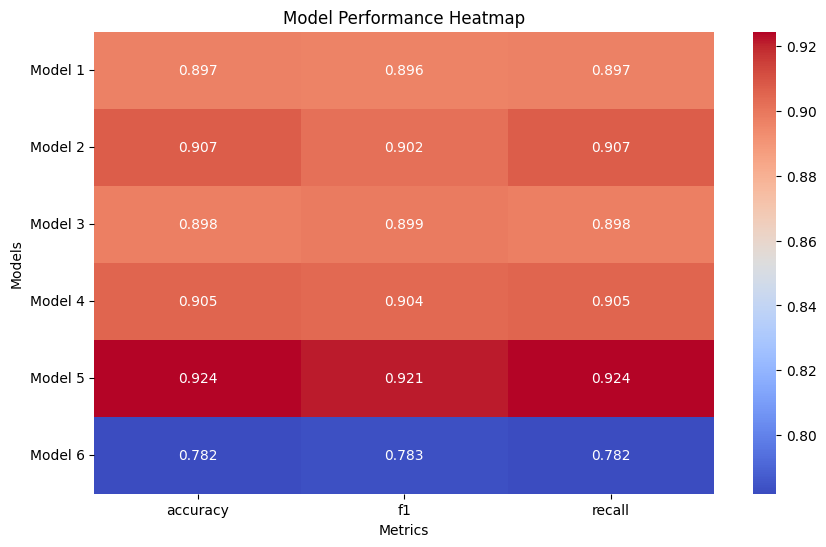

In [33]:
results_df = pd.DataFrame(model_results).T

print(results_df)

plt.figure(figsize=(10, 6))
sns.heatmap(results_df, annot=True, fmt=".3f", cmap="coolwarm", cbar=True)

plt.title('Model Performance Heatmap')
plt.xlabel('Metrics')
plt.ylabel('Models')
plt.yticks(rotation=0)

plt.show()

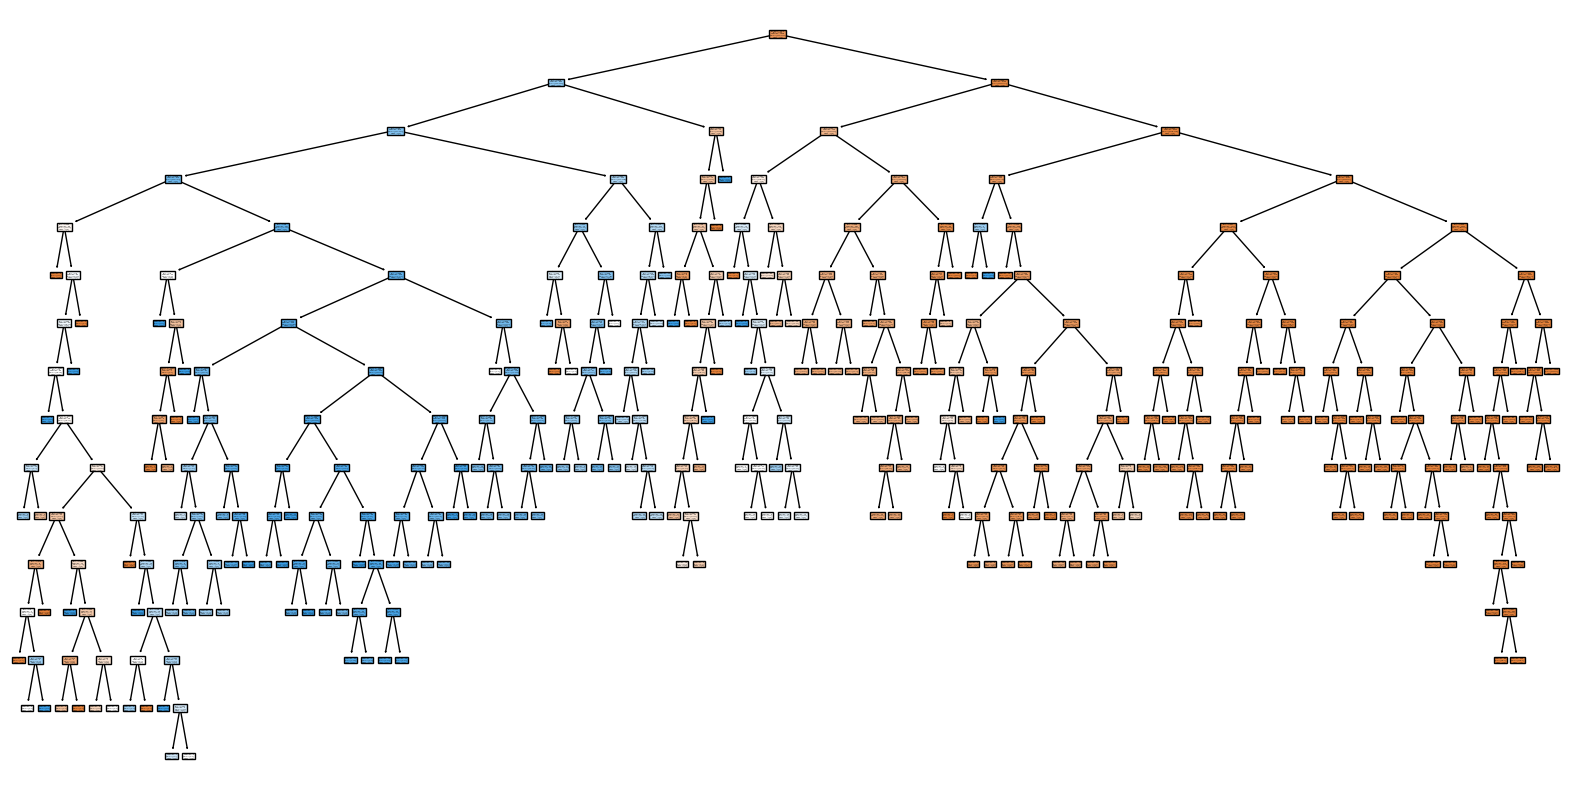

In [34]:
from graphviz import Source
model_features = models['Model 5']
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train[model_features], y_train)

dot_data = export_graphviz(clf, out_file=None,
                           feature_names=model_features,
                           class_names=True,
                           rounded=True,
                           special_characters=True)
graph = Source(dot_data)
graph.format = 'png'

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=model_features, class_names=True, filled=True)

plt.show()

In [37]:
graph.render(filename='tree', view=True)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [44]:
model_name = 'Model 5'
features = models[model_name]


test_sizes = [0.6] 
max_depths = [10]
test_results = []
random_state = 20

max_score = -1
best_params = []

for md in max_depths:
    for ts in test_sizes:
        model_data = df[features]
        x = model_data
        y = df['sex'] 
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=ts, random_state=random_state, stratify=y)

        model = DecisionTreeClassifier(random_state=random_state, max_depth=md)
        model.fit(x_train, y_train)
        
        y_pred_test = model.predict(x_test)
        print(f"Max Depth: {md}, Test Size: {ts}")
        print("Accuracy:", accuracy_score(y_test, y_pred_test))
        score = accuracy_score(y_test, y_pred_test)
        total_hiring = model.predict(x).sum()
        if score > max_score:
            max_score = score
            best_params = [md, ts]

print("Best Score:", max_score)
print("Best Parameters:", best_params)

Max Depth: 10, Test Size: 0.6
Accuracy: 0.9196278786030196
Best Score: 0.9196278786030196
Best Parameters: [10, 0.6]


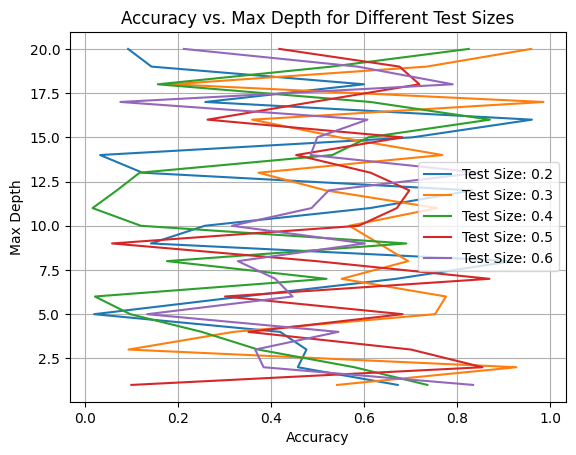

In [46]:
test_sizes = [0.2, 0.3, 0.4, 0.5, 0.6]
max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
accuracy_data = {(ts, md): np.random.rand() for ts in test_sizes for md in max_depths}

# Now we plot the accuracy vs. max depth for each test size
for ts in test_sizes:
    accuracies = [accuracy_data[(ts, md)] for md in max_depths]
    plt.plot(accuracies, max_depths, label=f'Test Size: {ts}')

plt.xlabel('Accuracy')
plt.ylabel('Max Depth')
plt.title('Accuracy vs. Max Depth for Different Test Sizes')
plt.grid()
plt.legend()
plt.show()

## Naive Bayes

In [53]:
X = df.drop('sex', axis=1)
y = df['sex']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Create a column transformer with OneHotEncoder for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # This leaves your other numeric columns untouched
)

# Fit the preprocessor and transform the feature data
X_processed = preprocessor.fit_transform(X)

# Split the processed data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42)

# Create and train the Multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Make predictions on the test data
predictions = clf.predict(X_test)

# Output the performance metrics
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy: 0.6864897834705703
              precision    recall  f1-score   support

           0       0.93      0.70      0.80      2876
           1       0.22      0.62      0.33       403

    accuracy                           0.69      3279
   macro avg       0.58      0.66      0.56      3279
weighted avg       0.84      0.69      0.74      3279



In [55]:
clf = BernoulliNB()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy: 0.8770966758157975
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      2876
           1       0.00      0.00      0.00       403

    accuracy                           0.88      3279
   macro avg       0.44      0.50      0.47      3279
weighted avg       0.77      0.88      0.82      3279



C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
models = {
    'Model 1': ['height', 'weight', 'age', 'grades_max'],
    'Model 2': ['height', 'weight', 'grades_max'],
    'Model 3': ['height', 'weight', 'age', 'grades_first'],
    'Model 4': ['height', 'weight', 'years_cl', 'grades_mean'],
    'Model 5': ['height', 'weight'],
    'Model 6': ['grades_max', 'grades_mean', 'age']
}

model = ['height', 'weight', 'age', 'grades_max']
X_selected = df[model]

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)
clf = MultinomialNB()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy: 0.8926501982311681
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      2876
           1       0.83      0.16      0.27       403

    accuracy                           0.89      3279
   macro avg       0.86      0.58      0.60      3279
weighted avg       0.89      0.89      0.86      3279



In [59]:
model_results = {}

for model_name, features in models.items():
    X_selected = df[features]
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)
    
    clf = MultinomialNB()
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    
    model_results[model_name] = {
        'accuracy': accuracy,
        'classification_report': classification_report(y_test, predictions, output_dict=True) 
    }
    
    print(f"Results for {model_name}:")
    print("Accuracy:", accuracy)
    print(classification_report(y_test, predictions))
    print("\n" + "-"*80 + "\n")  


Results for Model 1:
Accuracy: 0.8926501982311681
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      2876
           1       0.83      0.16      0.27       403

    accuracy                           0.89      3279
   macro avg       0.86      0.58      0.60      3279
weighted avg       0.89      0.89      0.86      3279


--------------------------------------------------------------------------------

Results for Model 2:
Accuracy: 0.8804513571210735
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      2876
           1       0.57      0.12      0.19       403

    accuracy                           0.88      3279
   macro avg       0.73      0.55      0.56      3279
weighted avg       0.85      0.88      0.84      3279


--------------------------------------------------------------------------------

Results for Model 3:
Accuracy: 0.8865507776761208
              precision    rec

C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\envs\VU\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Austie\anaconda3\en

In [63]:
model_results = {}

for model_name, features in models.items():
    X_selected = df[features]
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)
    
    clf = MultinomialNB()
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)

    model_results[model_name] = accuracy_score(y_test, predictions)

model_names = list(model_results.keys())
accuracies = list(model_results.values())

df_results = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies
})

df_pivot = df_results.set_index('Model')

plt.figure(figsize=(10, 6))
sns.heatmap(df_pivot, annot=True, cmap="coolwarm", cbar=False, fmt=".2f")
plt.title('Model Accuracies')
plt.show()

In [68]:
model_results = {}

for model_name, features in models.items():
    X_selected = df[features]

    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

    clf = MultinomialNB()
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    

    f1 = f1_score(y_test, predictions, average='macro')
    model_results[model_name] = {'f1': f1}


df_results = pd.DataFrame.from_dict(model_results, orient='index')


plt.figure(figsize=(10, 6))
sns.heatmap(df_results[['f1']], annot=True, cmap="coolwarm", cbar=True, fmt=".2f")
plt.title('Model F1 Scores')
plt.ylabel('Models')
plt.xlabel('F1 Score')
plt.show()

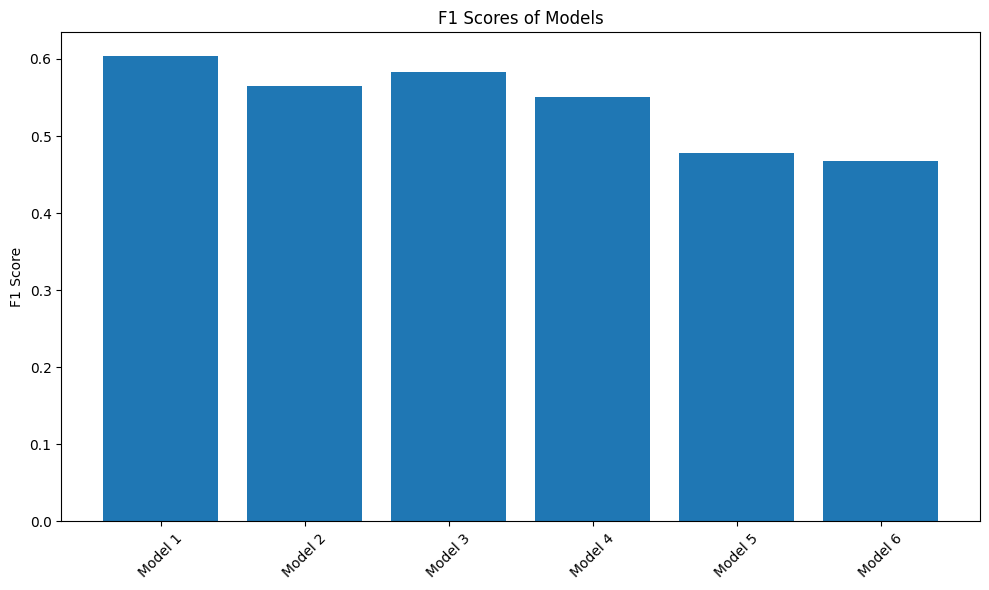

In [69]:
f1_scores = [results['f1'] for results in model_results.values()]
model_names = list(model_results.keys())

plt.figure(figsize=(10, 6))
plt.bar(model_names, f1_scores)
plt.title('F1 Scores of Models')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [71]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=model_names, y=accuracies, marker='o', linestyle='-', color='blue')

plt.title('Model Accuracies', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Models', fontsize=14)
plt.ylim([0, 1])
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

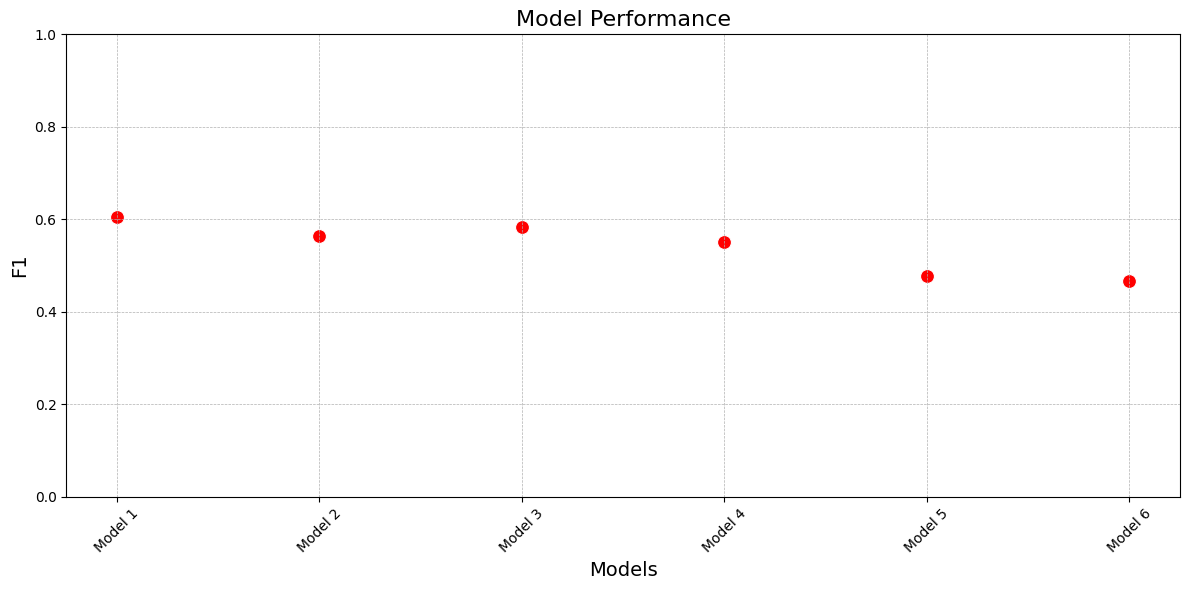

In [75]:
model_names = list(model_results.keys())

accuracies = []
for model_name in model_names:
    if 'accuracy' in model_results[model_name]:
        accuracies.append(model_results[model_name]['accuracy'])
    elif 'f1' in model_results[model_name]:
        accuracies.append(model_results[model_name]['f1'])
    else:
        accuracies.append(None) 


plt.figure(figsize=(12, 6))
sns.scatterplot(x=model_names, y=accuracies, s=100, color='red', marker='o')

plt.title('F1 scores for Models', fontsize=16)
plt.ylabel('F1', fontsize=14)
plt.xlabel('Models', fontsize=14)
plt.ylim([0, 1]) 
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()